# 1. Theory: problem statement

In [85]:
from IPython.display import IFrame
from gmpy2 import y0
from sklearn.ensemble._gradient_boosting import np_float32

IFrame(src='https://7reuv.csb.app/', width=700, height=600)

## 0. From-Linear-to-Logistic-Regression-Explained-Step-by-Step
#### refs: https://github.com/clareyan/From-Linear-to-Logistic-Regression-Explained-Step-by-Step




<div>
<img src="images/4_1.png" width="1000"/>
</div>

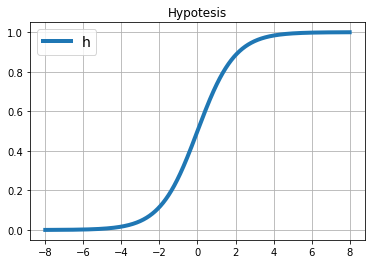

In [96]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

xx = np.linspace(-4,3,100000)

# this is a sigmoid calculation:
plt.plot(xx, [1/(1+2.76**(-x))  for x in xx], linewidth=4, label='h')

plt.title('Hypotesis')
plt.grid()
plt.legend(prop={'size': 14});

<div>
<img src="images/4_2.png" width="1000"/>
</div>

<div>
<img src="images/4_3.png" width="1000"/>
</div>

## 1.1 LogisticRegression



<div>
<img src="https://miro.medium.com/max/1610/1*dpgUu5e-bO6QLyyoScmwIg.png" width="500"/>
</div>

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
!wget https://raw.githubusercontent.com/clareyan/From-Linear-to-Logistic-Regression-Explained-Step-by-Step/master/Social_Network_Ads.csv


--2022-01-24 01:04:49--  https://raw.githubusercontent.com/clareyan/From-Linear-to-Logistic-Regression-Explained-Step-by-Step/master/Social_Network_Ads.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10926 (11K) [text/plain]
Saving to: 'Social_Network_Ads.csv'

     0K ..........                                            100% 2.57M=0.004s

2022-01-24 01:04:49 (2.57 MB/s) - 'Social_Network_Ads.csv' saved [10926/10926]



###  Importing the dataset

In [47]:

df = pd.read_csv('Social_Network_Ads.csv')

In [8]:
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [9]:
df.head(30)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


> Q1: Обработка датасета

In [48]:
# Task 1:
# Apply one-hot encoding for the needed columns

# Check answer on https://gist.github.com/adavydenko/dc6d11a04d82c5f6c17fb9f51b35581c


In [18]:
# ...

      User ID  Age  EstimatedSalary  Purchased  Gender_Female  Gender_Male
0    15624510   19            19000          0              0            1
1    15810944   35            20000          0              0            1
2    15668575   26            43000          0              1            0
3    15603246   27            57000          0              1            0
4    15804002   19            76000          0              0            1
..        ...  ...              ...        ...            ...          ...
395  15691863   46            41000          1              1            0
396  15706071   51            23000          1              0            1
397  15654296   50            20000          1              1            0
398  15755018   36            33000          0              0            1
399  15594041   49            36000          1              1            0

[400 rows x 6 columns]


In [59]:
#X = df_getdummy.drop('Purchased',axis=1)
#y = df_getdummy['Purchased']
X = df_getdummy.iloc[:, [1, 2]].values
y = df_getdummy.iloc[:, 3].values

> Q2: Сплит данных

In [60]:
# Task 2:
# Splitting the dataset into the Training set and Test set

# Check answer on https://gist.github.com/adavydenko/dc6d11a04d82c5f6c17fb9f51b35581c

In [ ]:
# ...

In [61]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

> Q3: Что делает StandardScaler ?

In [62]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [63]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [64]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[65,  3],
       [ 8, 24]], dtype=int64)

> Q4: Как вычислить точность используя матрицу ошибок ?

In [65]:
#caculate the accuracy score
# Accuracy = number of times you're right / number of predictions
from sklearn.metrics import accuracy_score

In [66]:
accuracy_score(y_true=y_train, y_pred=classifier.predict(X_train))

0.8233333333333334

> Q5: Как повлияет пол на результат ?

## 1.2 SVM

In [79]:
# Fitting SVM to the Training set using Kernel as linear.
from sklearn.svm import SVC
classifier = SVC(kernel='linear',random_state=0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [80]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [81]:
confusion_matrix(y_test, y_pred)

array([[66,  2],
       [ 8, 24]], dtype=int64)

In [82]:
accuracy_score(y_true=y_train, y_pred=classifier.predict(X_train))

0.8233333333333334

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


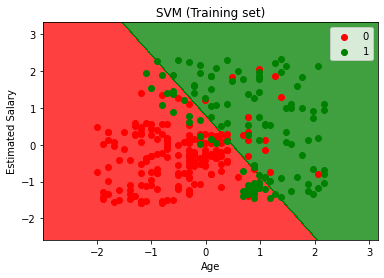

In [83]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


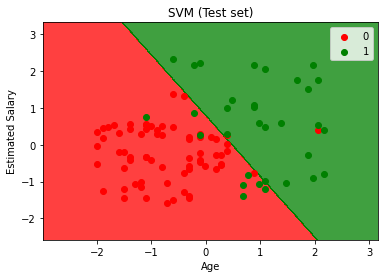

In [84]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

> Q6: Можно ли улучшить точность используя rbf ядро?

# 2. Practice: IRIS classification with SVM

In this practice you should apply SVM model to solve Iris classification.

Iris classification problem - is a very popular an entry for ML algorithms. Find additional details here: https://www.kaggle.com/uciml/iris

<div>
    <img src="images/svm_irises.png" width="800"/>
</div>


In [324]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

To load Iris dataset there is no need to go directly to kaggle, etc. Now, almost every well-known dataset is presented in the frameworks out of the box. The same SKLearn does.

To get dataset simply use ```dataset``` package & do ```.load_``` of corresponding data.

In [127]:
iris = datasets.load_iris()

Lets investigate the given data

In [128]:
# first understand the type of the object:
print(type(iris))

# searching for "sklearn.utils.Bunch" navgates to https://scikit-learn.org/stable/modules/generated/sklearn.utils.Bunch.html object description => hence this is just a key-value object
print(iris.keys())

# > dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In Python accessing values could be done in different way, e.g.:
```
> print(iris.data)
```
or by addressing property by name:
```
> print(iris["data"])
```

Note! property names are case-sensitive

In [129]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [130]:
iris.target_names[iris.target]

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [131]:
# create a pandas dataframe based on the iris' data,
# note: we're adding target column separately, cause it is not in the data object

df = pd.DataFrame(iris.data, columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
#df['target'] = iris.target
df['class'] = iris.target_names[iris.target]

In [93]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


To visualize Iris dataset we'll be using Seaborn framework (just for instance), and it's feature ```pairplot```

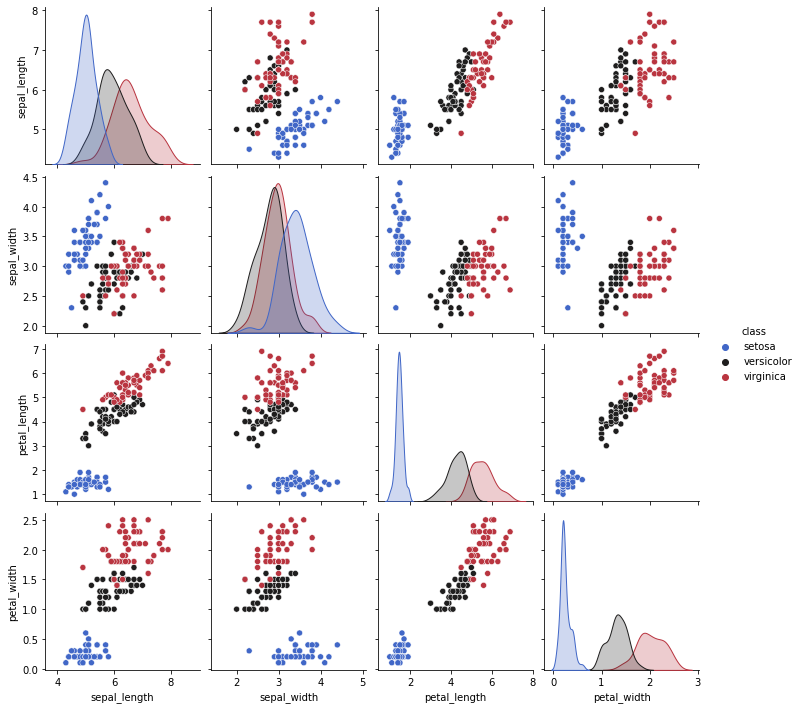

In [132]:
sns.pairplot(data = df, hue = 'class', palette = 'icefire')
#sns.pairplot(data = df, hue = 'class', diag_kind = 'hist')
#sns.pairplot(data = df, hue = 'class', kind = 'kde')

# for the full list see https://seaborn.pydata.org/generated/seaborn.pairplot.html


In [184]:
x = iris.data[:, :2]
y = iris.target

In [185]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.25)

In [238]:
model = svm.SVC(kernel = "rbf", random_state=0)

In [239]:
model.fit(x_train, y_train)

SVC(random_state=0)

In [240]:
y_pred = model.predict(x_test)

In [189]:
confusion_matrix(y_test, y_pred)

array([[34,  0,  0],
       [ 1, 26, 13],
       [ 0, 10, 29]])

In [190]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        34
           1       0.72      0.65      0.68        40
           2       0.69      0.74      0.72        39

    accuracy                           0.79       113
   macro avg       0.79      0.80      0.80       113
weighted avg       0.79      0.79      0.79       113



In [289]:
def make_meshgrid(x, y, h = 0.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    out = ax.contourf(xx, yy, Z, **params)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())

    return out

def plot_reals(ax, x0, x1, y, **params):
    ax.scatter(x0, x1, c=y, **params)


def plot_legends(ax, x0_title, x1_title, model_name):
    ax.set_xlabel(x0_title)
    ax.set_ylabel(x1_title)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(model_name)


In [248]:
x0, x1 = x[:, 0], x[:, 1]
xx, yy = make_meshgrid(x0, x1)

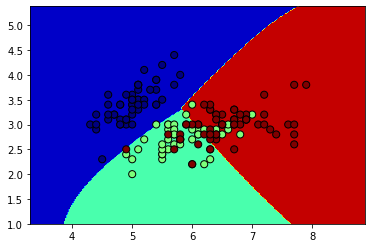

In [290]:
# https://matplotlib.org/stable/tutorials/colors/colormaps.html

axes = plt.axes()

plot_contours(axes, model, xx, yy, cmap = "jet")
plot_reals(axes, x0, x1, y, cmap = "jet", s = 50, edgecolors = "k")

plt.show()

In [ ]:
# plot several models: https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html

In [350]:
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (
    svm.SVC(kernel="linear", C=C),
    #svm.SVC(kernel="sigmoid"),
    svm.LinearSVC(max_iter=10000, C=C),
    svm.SVC(kernel="rbf", C=C), # gamma = 0.7
    svm.SVC(kernel="poly", C=C), #degree = 3, gamma = "auto"
)

# title for the plots
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    #"Sigmoid",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

<div>
    <img src="images/svm_kernels.png" width="800"/>
</div>

**C (Regularisation)**: C is the penalty parameter, which represents misclassification or error term. The misclassification or error term tells the SVM optimisation how much error is bearable. This is how you can control the trade-off between decision boundary and misclassification term.

When C is high it will classify all the data points correctly, also there is a chance to overfit.
<br/>

<div>
    <img src="images/svm_c.png" width="800" />
</div>

**Gamma**: It defines how far influences the calculation of plausible line of separation.

When gamma is higher, nearby points will have high influence; low gamma means far away points also be considered to get the decision boundary.
<br/>

<div>
    <img src="images/svm_gamma.png" width="800"/>
</div>

In [351]:
models = (clf.fit(x_train, y_train) for clf in models)

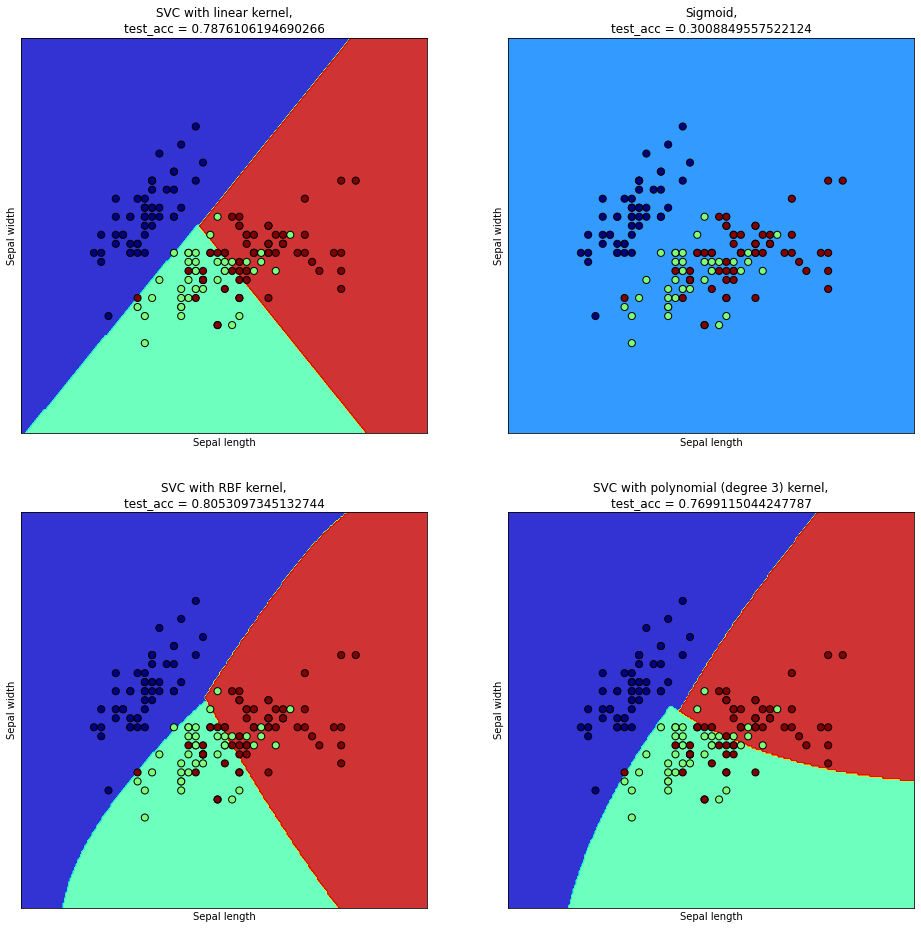

In [352]:
# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2, figsize=(16, 16))
#plt.subplots_adjust(wspace=0.8, hspace=0.8)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy, cmap="jet", alpha=0.8)
    plot_reals(ax, x0, x1, y, cmap = "jet", s = 50, edgecolors = "k")

    y_pred = clf.predict(x_test)
    acc = accuracy_score(y_test, y_pred)

    label = title + ",\ntest_acc = " + str(acc)
    plot_legends(ax, "Sepal length", "Sepal width", label)

plt.show()

In [353]:
from sklearn.model_selection import GridSearchCV

In [392]:
# Create a dictionary called param_grid and fill out some parameters for kernels, C and gamma

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

In [393]:
grid = GridSearchCV(svm.SVC(), param_grid, refit=True, verbose=1)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=1)

In [394]:
print(grid.best_estimator_)

SVC(C=1, gamma=1)


In [395]:
grid_predictions = grid.predict(x_train)
print(confusion_matrix(y_train, grid_predictions))
print(classification_report(y_train, grid_predictions))

[[16  0  0]
 [ 0  8  2]
 [ 0  4  7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.67      0.80      0.73        10
           2       0.78      0.64      0.70        11

    accuracy                           0.84        37
   macro avg       0.81      0.81      0.81        37
weighted avg       0.84      0.84      0.84        37



In [397]:
print(grid.cv_results_)

{'mean_fit_time': array([0.00049214, 0.0003016 , 0.00052299, 0.00029726, 0.00028195,
        0.00027318, 0.00027251, 0.0002852 , 0.00028315, 0.00028582,
        0.00027061, 0.00031066, 0.0003006 , 0.00034804, 0.00024257,
        0.00025415]),
 'std_fit_time': array([1.41019573e-04, 1.30046353e-05, 2.52134861e-04, 1.88253474e-05,
        1.82502220e-05, 6.37857707e-06, 4.48581880e-06, 1.82718872e-05,
        3.95161372e-05, 1.80735751e-05, 1.98332160e-06, 1.91300269e-05,
        3.09126583e-05, 3.46583538e-05, 5.14144566e-06, 3.27944734e-06]),
 'mean_score_time': array([0.00030379, 0.0001554 , 0.00020318, 0.00015292, 0.00015807,
        0.00014734, 0.00014658, 0.00014982, 0.0001545 , 0.00017142,
        0.00014796, 0.00016403, 0.00015874, 0.0002018 , 0.00013547,
        0.00013804]),
 'std_score_time': array([1.82997925e-04, 2.42390919e-06, 6.03637800e-05, 3.95688657e-06,
        2.24513853e-05, 2.37941264e-06, 2.83868333e-06, 5.23566331e-06,
        1.62299847e-05, 4.09422392e-05, 2.60

In [399]:
cv_df = pd.DataFrame(grid.cv_results_)
cv_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000492,0.000141,0.000304,0.000183,0.1,1,rbf,"{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}",0.750,0.500,0.571429,0.571429,0.571429,0.592857,0.083299,10
1,0.000302,0.000013,0.000155,0.000002,0.1,0.1,rbf,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}",0.500,0.375,0.428571,0.428571,0.428571,0.432143,0.039770,11
2,0.000523,0.000252,0.000203,0.000060,0.1,0.01,rbf,"{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}",0.500,0.375,0.428571,0.428571,0.428571,0.432143,0.039770,11
3,0.000297,0.000019,0.000153,0.000004,0.1,0.001,rbf,"{'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}",0.500,0.375,0.428571,0.428571,0.428571,0.432143,0.039770,11
4,0.000282,0.000018,0.000158,0.000022,1,1,rbf,"{'C': 1, 'gamma': 1, 'kernel': 'rbf'}",0.875,0.625,0.857143,0.857143,1.000000,0.842857,0.121323,1
5,0.000273,0.000006,0.000147,0.000002,1,0.1,rbf,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",0.875,0.625,0.857143,0.571429,0.714286,0.728571,0.121323,9
6,0.000273,0.000004,0.000147,0.000003,1,0.01,rbf,"{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}",0.500,0.375,0.428571,0.428571,0.428571,0.432143,0.039770,11
7,0.000285,0.000018,0.000150,0.000005,1,0.001,rbf,"{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}",0.500,0.375,0.428571,0.428571,0.428571,0.432143,0.039770,11
8,0.000283,0.000040,0.000154,0.000016,10,1,rbf,"{'C': 10, 'gamma': 1, 'kernel': 'rbf'}",0.875,0.625,0.857143,0.714286,0.857143,0.785714,0.099103,5
9,0.000286,0.000018,0.000171,0.000041,10,0.1,rbf,"{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}",0.875,0.625,0.857143,0.857143,1.000000,0.842857,0.121323,1


In [ ]:
# check more on para,=meters tuning here:
# https://scikit-learn.org/stable/modules/grid_search.html

## Remarks

1. https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html
2. https://matplotlib.org/stable/tutorials/text/text_intro.html
3. https://www.vebuso.com/2020/03/svm-hyperparameter-tuning-using-gridsearchcv/
4. https://scikit-learn.org/stable/modules/grid_search.html
5. https://scikit-learn.org/stable/auto_examples/model_selection/plot_randomized_search.html#sphx-glr-auto-examples-model-selection-plot-randomized-search-py